<a href="https://colab.research.google.com/github/gmx369x/Machine_Deep_Learning/blob/main/Retina_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To mount your Google Drive account to your Google Colab notebook.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = "/content/drive/MyDrive/Pictures/M/" # The image folder location.
image_name = "DSCN8279.jpg" # Image name.

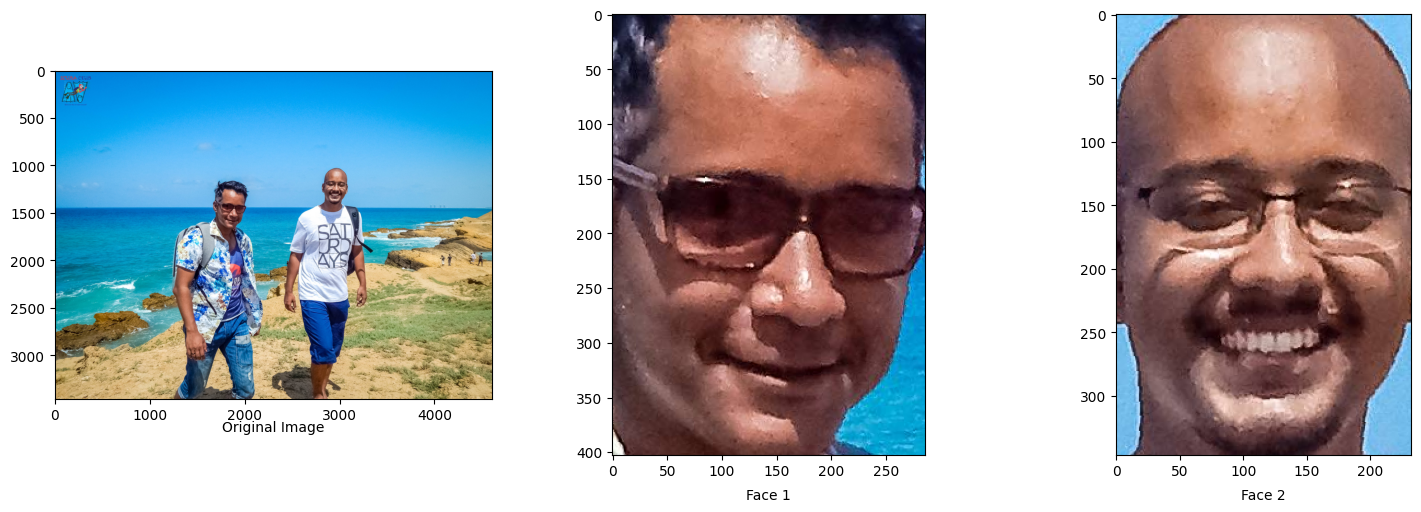

Successfully saved 2 face images


In [ ]:
import cv2
import matplotlib.pyplot as plt
!pip install retina-face
from retinaface import RetinaFace

image_path = folder_path+image_name # Set the image path.
base_image = cv2.imread(image_path) # Read the image.

# To implement face detection and alignment with RetinaFace.
faces = RetinaFace.extract_faces(img_path=image_path, align=True)

# Create subplots for each detected face + original
num_faces = len(faces)
fig, axes = plt.subplots(1, num_faces + 1, figsize=(15, 5)) # Adjust figsize as needed
fig.tight_layout()
axes = axes.ravel()

# Display the original image
axes[0].imshow(base_image[:, :, ::-1])
axes[0].text(0.5, -0.1, "Original Image", size=10, ha="center", transform=axes[0].transAxes)

# Display each detected and aligned face
for i, face in enumerate(faces):
    axes[i + 1].imshow(face)
    axes[i + 1].text(0.5, -0.1, f"Face {i + 1}", size=10, ha="center", transform=axes[i + 1].transAxes)

plt.show()


# Save each detected and aligned face individually
for i, face in enumerate(faces):
    cv2.imwrite(folder_path + f"Face_Alignment_{i + 1}.jpg", face[:, :, ::-1])

print(f"Successfully saved {num_faces} face images")

Processing image: 1_C1tHNJ9SF0fvz0wcYJX1gw.jpg
1/1 [==============================] - 0s 70ms/step


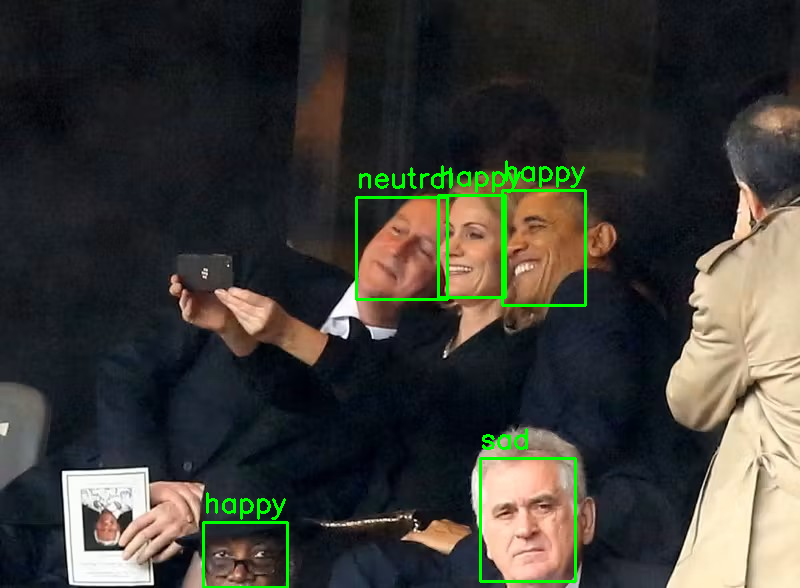

Processing image: 1_TNiZyR7YFUNYC0c9Ft4XjA.jpg
1/1 [==============================] - 0s 116ms/step


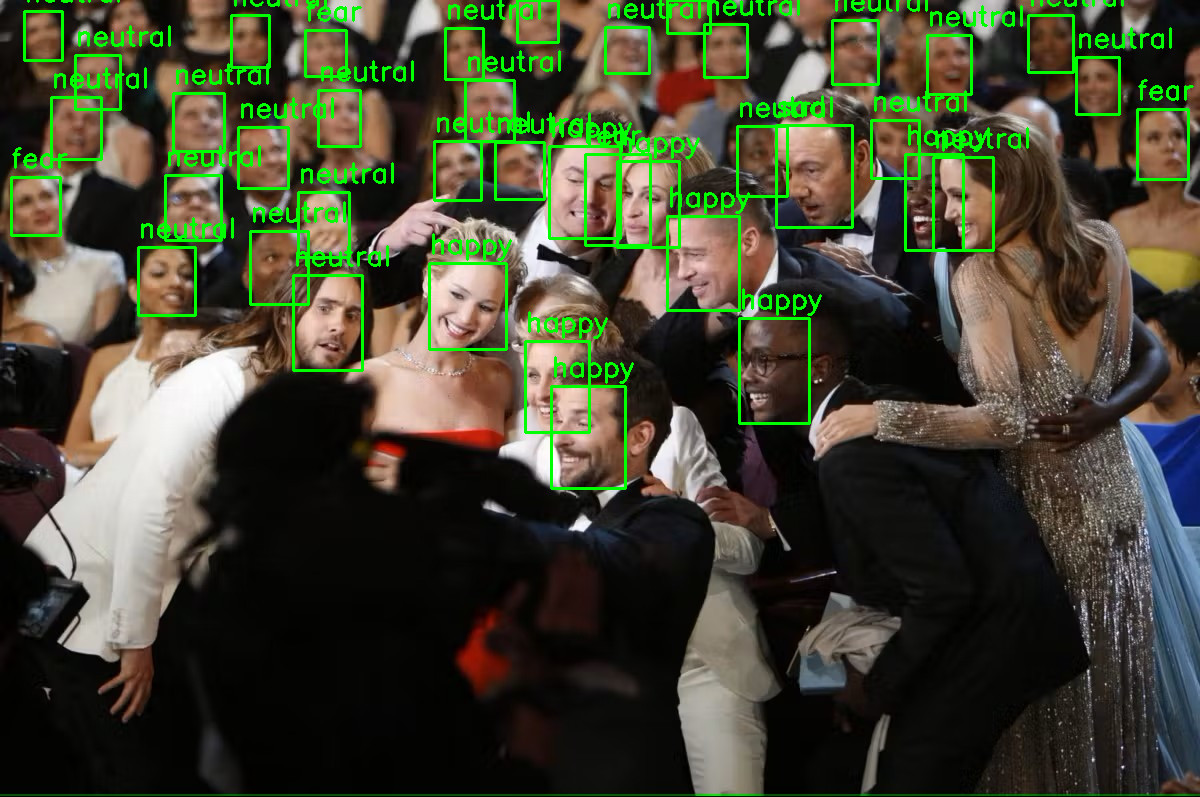

Processing image: myuuxslhz7udhdxj0ihh.jpg
1/1 [==============================] - 0s 71ms/step


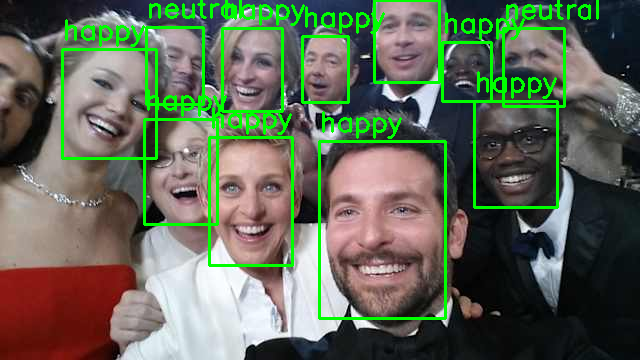

Processing image: kkzlweq25a5ndtobuagk.jpg
1/1 [==============================] - 0s 76ms/step


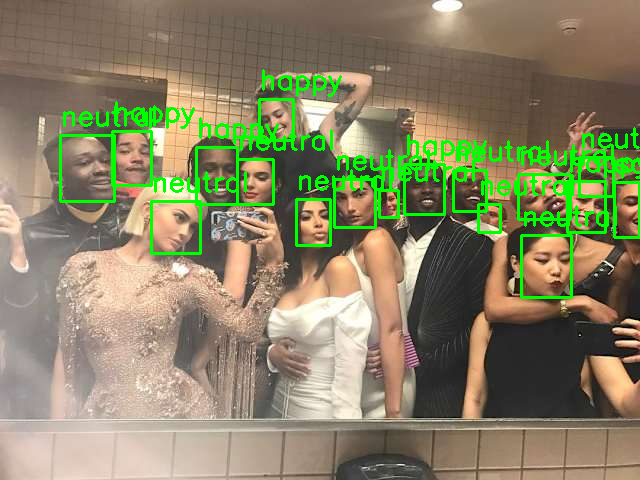

Processing image: v03eqfawaygdkfu2epz1.jpg
1/1 [==============================] - 0s 139ms/step


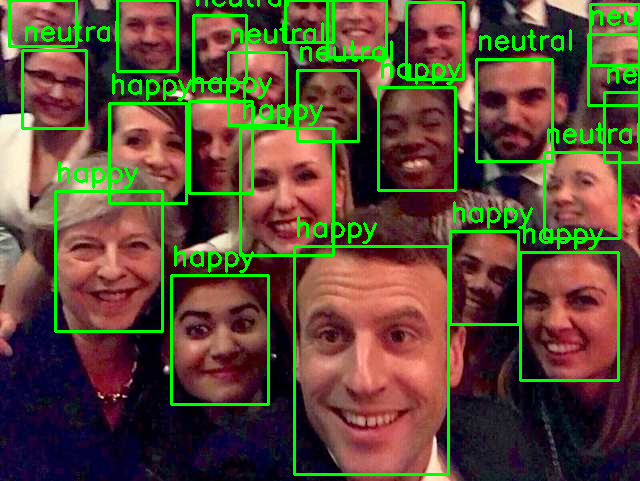

In [ ]:
import os
import cv2
from tensorflow.keras.models import load_model
from retinaface import RetinaFace
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load the emotion detection model
emotion_model = load_model('/content/drive/MyDrive/emotion_xception.h5')

# Define emotion labels
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

def detect_and_recognize_emotions(image_path):
    """
    Detects faces, aligns them, and predicts emotions.

    Args:
        image_path (str): Path to the input image.

    Returns:
        List[dict]: Information about detected faces and predicted emotions.
    """
    try:
        # Detect faces and align them
        faces = RetinaFace.detect_faces(img_path=image_path)
        aligned_faces = RetinaFace.extract_faces(img_path=image_path, align=True)
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return []

    results = []
    for face_data, aligned_face in zip(faces.values(), aligned_faces):
        # Check if aligned_face is valid
        if aligned_face is None or aligned_face.size == 0:
            print(f"Warning: Skipping invalid face data in {image_path}")
            continue

        # Extract bounding box coordinates
        x1, y1, x2, y2 = face_data['facial_area']

        # Preprocess the face for the emotion model
        face_resized = cv2.resize(aligned_face, (96, 96))
        face_normalized = face_resized / 255.0
        face_input = face_normalized.reshape(1, 96, 96, 3)

        # Predict emotion
        emotion_prediction = emotion_model.predict(face_input)[0]
        predicted_emotion = emotion_labels[emotion_prediction.argmax()]

        results.append({
            'face_image': aligned_face,
            'emotion': predicted_emotion,
            'x1': x1,
            'y1': y1,
            'x2': x2,
            'y2': y2
        })

    return results

def draw_results(image_path, results):
    """
    Draws bounding boxes and emotion labels on the image and displays it.

    Args:
        image_path (str): Path to the input image.
        results (List[dict]): Detected faces and predicted emotions.
    """
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    for result in results:
        x1, y1, x2, y2 = result['x1'], result['y1'], result['x2'], result['y2']
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, result['emotion'], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    cv2_imshow(img)

def process_folder(folder_path):
    """
    Processes all images in a folder for emotion detection.

    Args:
        folder_path (str): Path to the folder containing images.
    """
    if not os.path.isdir(folder_path):
        print(f"Error: {folder_path} is not a valid directory.")
        return

    # Iterate through all image files in the folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Skip non-image files
        if not (filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg')):
            print(f"Skipping non-image file: {filename}")
            continue

        print(f"Processing image: {filename}")
        detected_emotions = detect_and_recognize_emotions(file_path)
        draw_results(file_path, detected_emotions)

# Example usage
folder_path = '/content/drive/MyDrive/facial_emotional_samples'
process_folder(folder_path)


Processing image: 1_C1tHNJ9SF0fvz0wcYJX1gw.jpg
1/1 [==============================] - 2s 2s/step


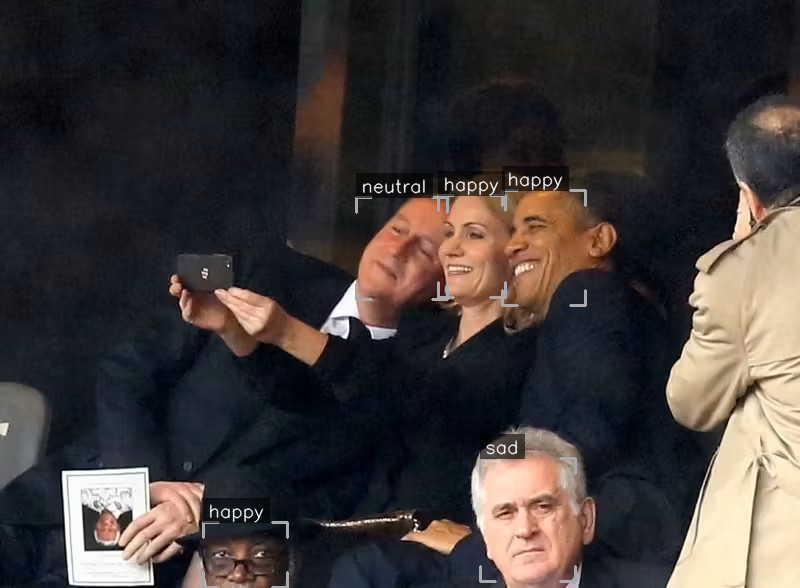

Processing image: 1_TNiZyR7YFUNYC0c9Ft4XjA.jpg
Skipping invalid face data.
2/2 [==============================] - 1s 285ms/step


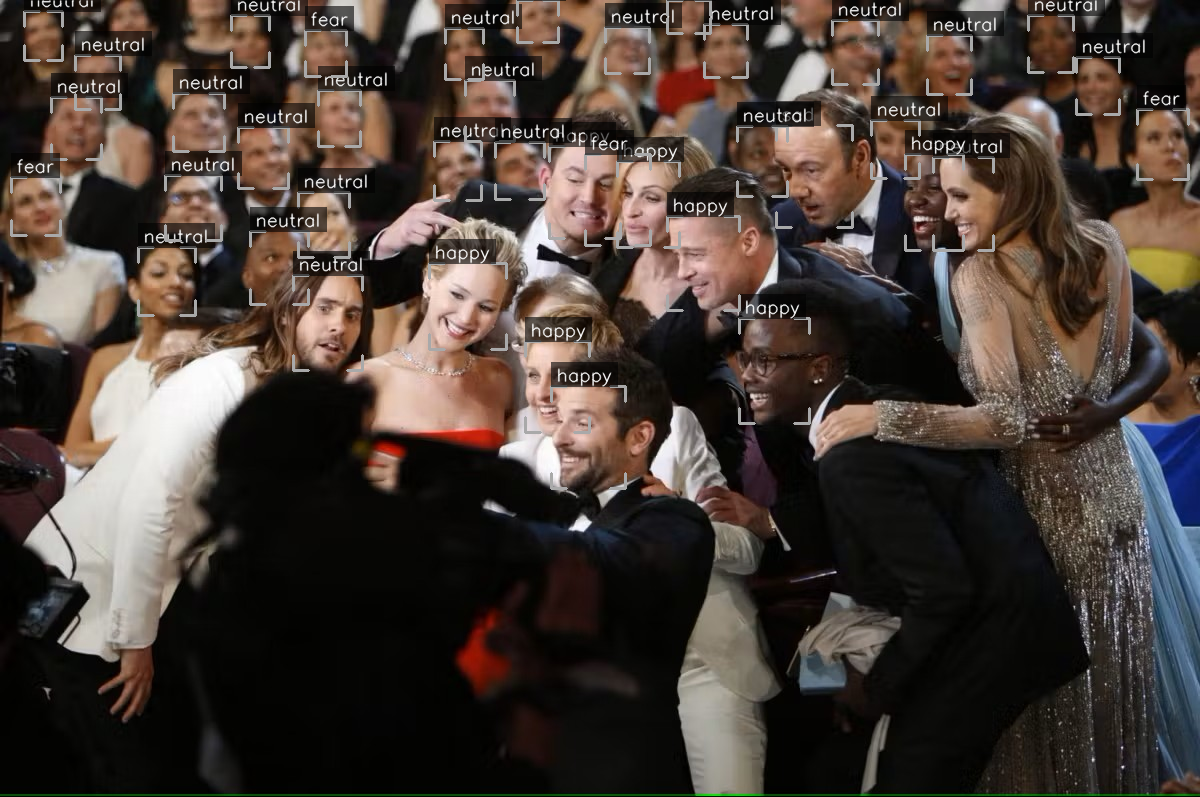

Processing image: myuuxslhz7udhdxj0ihh.jpg
1/1 [==============================] - 0s 366ms/step


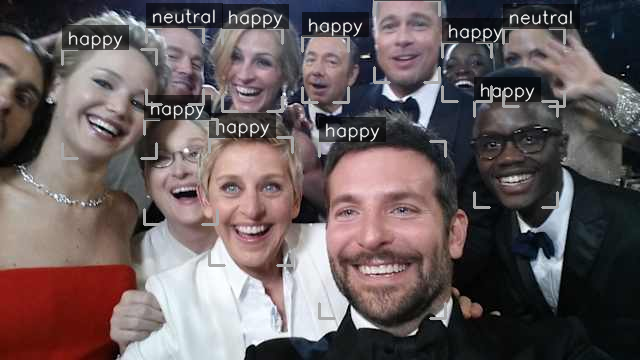

Processing image: kkzlweq25a5ndtobuagk.jpg
1/1 [==============================] - 1s 611ms/step


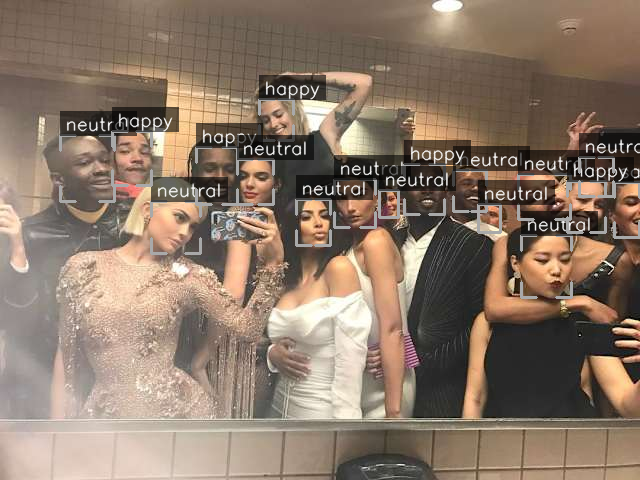

Processing image: v03eqfawaygdkfu2epz1.jpg
1/1 [==============================] - 1s 1s/step


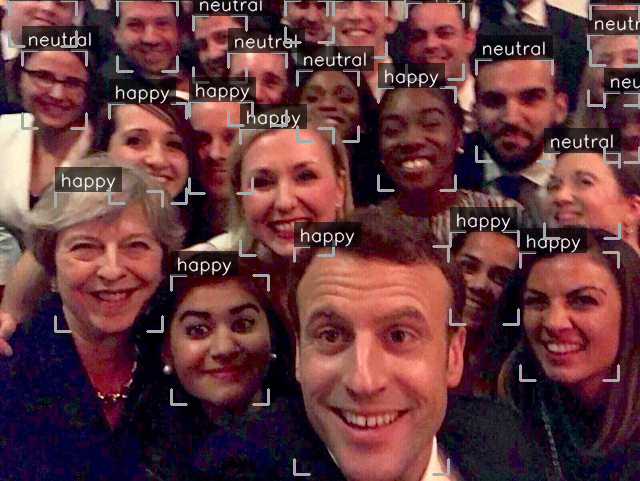

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from retinaface import RetinaFace
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load the emotion detection model
emotion_model = load_model('/content/drive/MyDrive/emotion_xception.h5')

# Define emotion labels
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Preprocess face images for the emotion model
def preprocess_face(face_image):
    face_resized = cv2.resize(face_image, (96, 96))
    face_normalized = face_resized / 255.0
    return face_normalized.reshape(1, 96, 96, 3)

# Detect and predict emotions for an image
def detect_and_recognize_emotions(image_path):
    """
    Detects faces, aligns them, and predicts emotions.

    Args:
        image_path (str): Path to the input image.

    Returns:
        List[dict]: Detected faces with bounding boxes and predicted emotions.
    """
    try:
        faces = RetinaFace.detect_faces(img_path=image_path)
        aligned_faces = RetinaFace.extract_faces(img_path=image_path, align=True)
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return []

    results = []
    face_inputs = []

    for face_data, aligned_face in zip(faces.values(), aligned_faces):
        if aligned_face is None or aligned_face.size == 0:
            print("Skipping invalid face data.")
            continue

        # Extract bounding box coordinates
        x1, y1, x2, y2 = face_data['facial_area']

        # Preprocess face and add to batch
        face_input = preprocess_face(aligned_face)
        face_inputs.append((face_input, x1, y1, x2, y2, aligned_face))

    if face_inputs:
        batch_inputs = np.vstack([f[0] for f in face_inputs])
        predictions = emotion_model.predict(batch_inputs)

        for prediction, face_info in zip(predictions, face_inputs):
            x1, y1, x2, y2, aligned_face = face_info[1:]
            predicted_emotion = emotion_labels[np.argmax(prediction)]
            results.append({
                'face_image': aligned_face,
                'emotion': predicted_emotion,
                'x1': x1,
                'y1': y1,
                'x2': x2,
                'y2': y2
            })

    return results

# Draw bounding boxes and emotions on the image
def draw_results(image_path, results):
    """
    Draws subtle, futuristic corner-only bounding boxes and emotion labels on the image.

    Args:
        image_path (str): Path to the input image.
        results (List[dict]): Detected faces and predicted emotions.
    """
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    for result in results:
        x1, y1, x2, y2 = result['x1'], result['y1'], result['x2'], result['y2']
        emotion = result['emotion']

        # Colors for minimalistic style
        box_color = (169, 169, 169)  # Light gray
        text_color = (255, 255, 255)  # White

        # Corner box length and thickness
        corner_length = 15
        thickness = 2

        # Top-left corner
        cv2.line(img, (x1, y1), (x1 + corner_length, y1), box_color, thickness)  # Horizontal
        cv2.line(img, (x1, y1), (x1, y1 + corner_length), box_color, thickness)  # Vertical

        # Top-right corner
        cv2.line(img, (x2, y1), (x2 - corner_length, y1), box_color, thickness)  # Horizontal
        cv2.line(img, (x2, y1), (x2, y1 + corner_length), box_color, thickness)  # Vertical

        # Bottom-left corner
        cv2.line(img, (x1, y2), (x1 + corner_length, y2), box_color, thickness)  # Horizontal
        cv2.line(img, (x1, y2), (x1, y2 - corner_length), box_color, thickness)  # Vertical

        # Bottom-right corner
        cv2.line(img, (x2, y2), (x2 - corner_length, y2), box_color, thickness)  # Horizontal
        cv2.line(img, (x2, y2), (x2, y2 - corner_length), box_color, thickness)  # Vertical

        # Draw emotion label
        font_scale = 0.6
        font_thickness = 1
        font = cv2.FONT_HERSHEY_SIMPLEX

        # Calculate text background dimensions
        text_size, _ = cv2.getTextSize(emotion, font, font_scale, font_thickness)
        text_w, text_h = text_size
        text_bg_x1, text_bg_y1 = x1, y1 - text_h - 10
        text_bg_x2, text_bg_y2 = x1 + text_w + 10, y1

        # Draw semi-transparent text background
        overlay = img.copy()
        alpha = 0.6
        cv2.rectangle(overlay, (text_bg_x1, text_bg_y1), (text_bg_x2, text_bg_y2), (0, 0, 0), -1)
        cv2.addWeighted(overlay, alpha, img, 1 - alpha, 0, img)

        # Draw the text
        cv2.putText(img, emotion, (x1 + 5, y1 - 5), font, font_scale, text_color, font_thickness, cv2.LINE_AA)

    # Display the image
    cv2_imshow(img)



# Process all images in a folder
def process_folder(folder_path):
    """
    Processes all images in a folder for emotion detection.

    Args:
        folder_path (str): Path to the folder containing images.
    """
    if not os.path.isdir(folder_path):
        print(f"Error: {folder_path} is not a valid directory.")
        return

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if not filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            continue

        print(f"Processing image: {filename}")
        detected_emotions = detect_and_recognize_emotions(file_path)
        if detected_emotions:
            draw_results(file_path, detected_emotions)

# Example usage
folder_path = '/content/drive/MyDrive/facial_emotional_samples'
process_folder(folder_path)
